<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatistica/me/est_tarefa_aula09_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Métodos Estatísticos - 2021/2**

* **Exercícios - Aula 09 e 10**
* **Prof.: Diego Barreto Haddad**
* **Aluno: Janio de Souza Lima**



---

## Preparação do ambiente e funções gerais

In [1]:
#Carga de bibliotecas usadas nas questões
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Questão 1:

A médias das provas de uma determinada disciplina tem uma média 470,3 e um desvio padrdão de 138, para uma amostra com 250 estudantes.  Construa intervalos de confiança de 95% e 99% e explique porque os intervalos são diferentes.

In [2]:
def ic(x_bar, sigma, n, conf, z):
  #Função implementada com base em Jay L. Devore
  l = x_bar - (z * (sigma/np.sqrt(n))) #Limite inferior do intervalo
  u = x_bar + (z * (sigma/np.sqrt(n))) #Limite superior do intervalo
  return (l,u)

In [3]:
#Teste da função para exemplo 7.1 Jay L. Devore
#Espera-se que os valores seja aprox. (79.3, 80.7)
ic(80, 2, 31, 0.95, 1.96)

(79.29594721605504, 80.70405278394496)

In [4]:
x_bar = 470.3
sigma = 138
n = 250

* Cálculo do intervalo de confiança para 95%

In [5]:
conf1 = 0.95
z1 = 1.96

In [6]:
l1, u1 = ic(x_bar, sigma, n, conf1, z1)
print(round(l1, 1), round(u1, 1))

453.2 487.4


* Cálculo do intervalo de confiança para 99%

In [7]:
conf2 = 0.99
z2 = 2.58

In [8]:
l2, u2 = ic(x_bar, sigma, n, conf2, z2)
print(round(l2, 1), round(u2, 1))

447.8 492.8


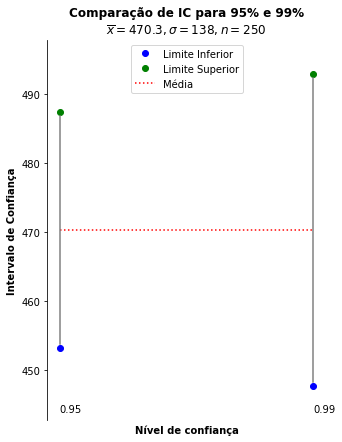

In [9]:
#Comparação visual
plt.figure(figsize=(5,7))
plt.title('Comparação de IC para 95% e 99%\n$\overline{x}=470.3, \sigma=138, n=250$',
          fontweight='bold')

#Dados dos intervalos calculados
plt.plot([l1, l2], 'bo')
plt.plot([u1, u2], 'go')
plt.plot([x_bar, x_bar], 'r:')
ymin = (min(l1, l2)-5)
ymax = (max(u1, u2)+5)
plt.ylim([ymin,ymax])

#Níveis de confiança
plt.annotate(str(conf1), (0,(ymin+1.2)))
plt.annotate(str(conf2), (1,(ymin+1.2)))
#Reta vertical para ligar os pontos do IC
plt.axvline(x=0, ymin=0.2, ymax=0.8, color='gray')
plt.axvline(x=1, ymin=0.1, ymax=0.9, color='gray')

#Ajustes visuais
plt.ylabel('Intervalo de Confiança', fontweight='bold')
plt.xlabel('Nível de confiança', fontweight='bold')
plt.xticks([])
plt.legend(['Limite Inferior', 'Limite Superior', 'Média'], loc='upper center')
sns.despine(bottom=True)

Observa-se que com para se ter um nível de confiança maior o intervalo é mais largo, pois como explica Devore [2006] o nível de confiança é inversamente relacionado à precisão, levando assim a termos intervalos cada vez maiores à medida que aumentamos a exigência do nível de confinça, chegando a $(- \infty, \infty)$ para uma confiança de 100%.

## Questão 2:

Químicos orgânicos comumente purificam componente orgânicos por meio de cristalização fracionária. Um técnico de laboratório planeja preparar e purificar algumas amostras, cada uma das quais com 4,85 g de anilina.  Ele alega que seu procedimento teoricamente produz 3,34 g de acetanilida.  Numa amostra com 16 elementos, encontra-se uma média de 3,5, com um desvio padrão de 0,55.  Teste a alegação feita pelo químico.

* $H_0$: Conteúdo médio igual a $3.34 g$ de acetanilida
* $H_1$: Conteúdo médio diferente de $3.34$  de acetanilida

In [10]:
sig = 0.05 #Significância
x = 3.5    #Valor observado
u = 3.34   #Média testada por H0
n = 16     #Tamanho da amostra
s = 0.55   #Desvio padrão

In [11]:
z_sig_sob2 = norm.ppf(sig/2)
print(z_sig_sob2)

-1.9599639845400545


In [12]:
z=(x-u)/(s/np.sqrt(n))
z

1.1636363636363645

In [13]:
area=norm.cdf(z)
print(area)

0.8777142958343254


In [14]:
#Cálculo do p-valor
pvalor=2*(1-area)
print(pvalor)

0.24457140833134927


In [15]:
#Comparação do p-valor com o nível de significância definido
if (pvalor <= sig):
    print('rejeita h0')
else:
    print('aceita h0')

#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

aceita h0


Aceitamos $H_0$, tendo em vista que o p-Valor é maior que o nível de significância desejado.

## Questão 3:

Uma máquina é projetada de modo a produzir um conteúdo médio de suco por garrafa igual a $\mu$.  Uma amostra de 36 garrafas produz um conteúdo médio de 48,5 cl.  Teste a hipótese de que o conteúdo médio por garrafa sejade 50 cl, a um nível de significância de 5%.  Assuma que o desvio padrão da população seja $\sigma = 5$ cl.

* $H_0$: Conteúdo médio igual a $50 cl$
* $H_1$: Conteúdo médio diferente de $50 cl$

In [16]:
sig = 0.05 #Significância
x = 48.5 #Valor observado
u = 50 #Média testada por H0
n = 36 #Tamanho da amostra
s = 5 #Desvio padrão

In [17]:
z_sig_sob2 = norm.ppf(sig/2)
print(z_sig_sob2)

-1.9599639845400545


In [18]:
z=(x-u)/(s/np.sqrt(n))
z

-1.7999999999999998

In [19]:
area=norm.cdf(z)
print(area)

0.03593031911292581


In [20]:
#Cálculo do p-valor
pvalor=2*(1-area)
print(pvalor)

1.9281393617741485


In [21]:
#Comparação do p-valor com o nível de significância definido
if (pvalor <= sig):
    print('rejeita h0')
else:
    print('aceita h0')

#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

aceita h0


Aceitamos $H_0$, tendo em vista que o p-Valor é maior que o nível de significância desejado.

#Referências

Jay L. Devore. **Probabilidade e Estatística para engenharia e ciências**. Cengage, 2006.

Pedro A. Morettin, Wilton de O. Bussab. **Estatística Básica**. Saraiva, 2017.

Ronald E. Walpole, Raymond H. Myers, Sharon L. Myers e Keying Ye. **Probability & Statistics for Engineers & Scientistis**. Pearson, 2012.

---

**Códigos e materiais complementares:**
* Versão online desse notebook: https://github.com/janiosl/python.ds/blob/master/estatistica/me/est_tarefa_aula09_10.ipynb